In [1]:
# Imports
import fastf1
import matplotlib as mpl
import matplotlib.pyplot as plt
from fastf1 import plotting
from timple.timedelta import strftimedelta
from fastf1.core import Laps
import pandas as pd
import seaborn as sns

In [2]:
year = 2022 #GP year
gp = 'Jeddah' # GP name
event = 'Q' # Q for qualifying, FP1 for free practice 1, R for race

In [3]:

# Configure matplotlib and f1 plots with this intit
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (6,6)
#fastf1.Cache.enable_cache('\cache')
fastf1.plotting.setup_mpl()
fastf1.plotting.setup_mpl(mpl_timedelta_support = True, color_scheme = 'fastf1', misc_mpl_mods = False)


In [11]:
# Get qualification session
session = fastf1.get_session(year, gp, event)
session.load()
laps = session.laps
#laps.dropna(subset=['Driver'], inplace = True)
laps = laps.pick_accurate()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v2.2.1]
api            INFO 	Fetching driver list...
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
core           INFO 	Finished loading data for 20 drivers: ['16', '27', '23', '3', '18', '63', '24', '47', '44', '22', '14', '20', '10', '31', '77', '55', '11', '1', '4', '6']


In [12]:
# Get an array of all drivers
drivers = pd.unique(laps['Driver'])
print(drivers)

# Get each driver fastest lap
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

['LEC' 'HUL' 'ALB' 'RIC' 'STR' 'RUS' 'ZHO' 'MSC' 'HAM' 'ALO' 'MAG' 'GAS'
 'OCO' 'BOT' 'SAI' 'PER' 'VER' 'NOR' 'LAT']


In [13]:
# Get the pole lap
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']
fastest_laps['LapTimeDelta'] = fastest_laps['LapTimeDelta'].dt.total_seconds()
#print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

In [14]:
# Get all team colors
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

/usr/local/lib/python3.9/site-packages/fastf1/core.py:917: FutureWarning: The property `Session.weekend` has been renamed to `Session.event`.
 The old property will be removed ina future version.
  warnings.warn("The property `Session.weekend` has been renamed to "
/usr/local/lib/python3.9/site-packages/fastf1/events.py:634: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


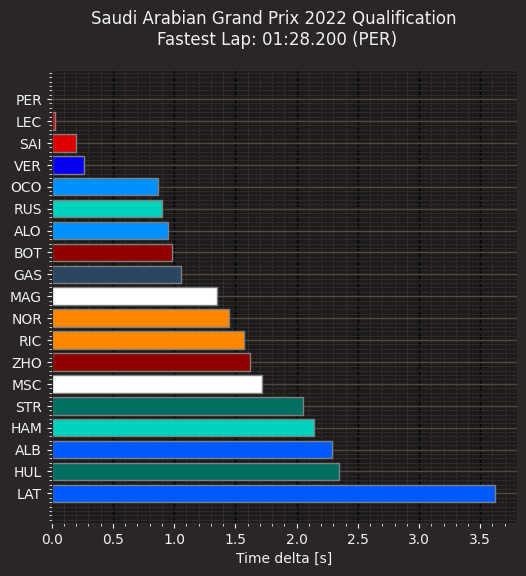

In [15]:
# Plot the table
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.weekend.name} {session.weekend.year} Qualification \n"
f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plt.xlabel('Time delta [s]')
plt.show()

In [57]:
lec_lap = laps.pick_driver('LEC').pick_fastest()
lec_tel = lec_lap.get_telemetry()
ver_lap = laps.pick_driver('VER').pick_fastest()
ver_tel = ver_lap.get_telemetry()
per_lap = laps.pick_driver('PER').pick_fastest()
per_tel = per_lap.get_telemetry()

Text(0.5, 1.0, 'Saudi Arabian Grand Prix 2022 \nFP1, Leclerc vs Verstappen')

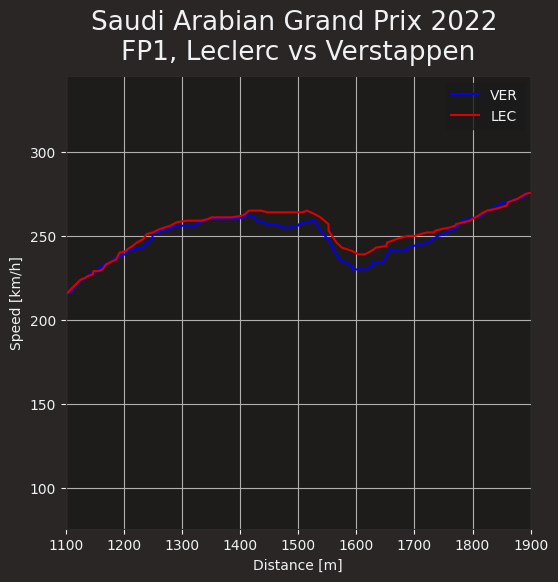

In [33]:
plt.plot(ver_tel['Distance'], ver_tel['Speed'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(lec_tel['Distance'], lec_tel['Speed'], label='LEC', color=fastf1.plotting.team_color('Ferrari'))
plt.xlabel('Distance [m]')
plt.ylabel('Speed [km/h]')
plt.grid()
plt.legend()
plt.xlim(1100, 1900)
plt.title(f"{session.event.EventName} {session.event.year} \nFP1, Leclerc vs Verstappen")

In [34]:
ver_tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-03-26 19:03:49.234,0 days 02:18:13.291000,,1071.272500,0 days 00:00:00,11078,310,8,100,False,12,interpolation,0.065417,0.000011,OnTrack,-1298,238,118
3,2022-03-26 19:03:49.433,0 days 02:18:13.490000,,1071.272500,0 days 00:00:00.199000,11095,311,8,100,False,12,pos,17.336027,0.002850,OnTrack,-1358,399,118
4,2022-03-26 19:03:49.459,0 days 02:18:13.516000,,1071.272500,0 days 00:00:00.225000,11130,312,8,100,False,12,car,19.597222,0.003222,OnTrack,-1365,420,118
5,2022-03-26 19:03:49.632,0 days 02:18:13.689000,,1071.272500,0 days 00:00:00.398000,11173,313,8,100,False,12,pos,34.672399,0.005700,OnTrack,-1418,562,118
6,2022-03-26 19:03:49.699,0 days 02:18:13.756000,77,1071.272500,0 days 00:00:00.465000,11216,314,8,100,False,12,car,40.530556,0.006663,OnTrack,-1438,617,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,2022-03-26 19:05:17.353,0 days 02:19:41.410000,77,841.985278,0 days 00:01:28.119000,10734,300,8,100,False,12,pos,6047.126912,0.994120,OnTrack,-1200,-45,118
666,2022-03-26 19:05:17.379,0 days 02:19:41.436000,77,838.451944,0 days 00:01:28.145000,10812,302,8,100,False,12,car,6049.313889,0.994479,OnTrack,-1206,-26,118
667,2022-03-26 19:05:17.538,0 days 02:19:41.595000,77,833.770278,0 days 00:01:28.304000,10819,303,8,100,False,12,car,6062.696389,0.996679,OnTrack,-1253,107,118
668,2022-03-26 19:05:17.552,0 days 02:19:41.609000,77,833.770278,0 days 00:01:28.318000,10848,303,8,100,False,12,pos,6063.874865,0.996873,OnTrack,-1258,120,118


In [35]:
lec_tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-03-26 19:03:04.907,0 days 02:17:28.964000,,1057.620556,0 days 00:00:00,10716,300,8,100,False,12,interpolation,0.030056,0.000005,OnTrack,-1341,356,117
3,2022-03-26 19:03:05.033,0 days 02:17:29.090000,,1057.620556,0 days 00:00:00.126000,10734,301,8,100,False,12,pos,10.602647,0.001730,OnTrack,-1380,461,118
4,2022-03-26 19:03:05.178,0 days 02:17:29.235000,,1057.620556,0 days 00:00:00.271000,10769,302,8,100,False,12,car,22.761111,0.003713,OnTrack,-1406,531,118
5,2022-03-26 19:03:05.353,0 days 02:17:29.410000,,1057.620556,0 days 00:00:00.446000,10782,302,8,100,False,12,pos,37.435666,0.006107,OnTrack,-1433,602,118
6,2022-03-26 19:03:05.378,0 days 02:17:29.435000,63,1057.620556,0 days 00:00:00.471000,10796,302,8,100,False,12,car,39.538889,0.006450,OnTrack,-1438,616,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,2022-03-26 19:04:31.993,0 days 02:18:56.050000,20,1108.186944,0 days 00:01:27.086000,10519,294,8,100,False,12,pos,6010.880664,0.980596,OnTrack,-997,-667,119
667,2022-03-26 19:04:32.098,0 days 02:18:56.155000,20,1101.770278,0 days 00:01:27.191000,10602,296,8,100,False,12,car,6019.539722,0.982009,OnTrack,-1022,-584,118
668,2022-03-26 19:04:32.253,0 days 02:18:56.310000,20,1097.186944,0 days 00:01:27.346000,10633,297,8,100,False,12,pos,6032.364920,0.984101,OnTrack,-1062,-462,119
669,2022-03-26 19:04:32.298,0 days 02:18:56.355000,20,1092.603611,0 days 00:01:27.391000,10665,298,8,100,False,12,car,6036.095278,0.984710,OnTrack,-1073,-426,119


Text(0.5, 1.0, 'Verstappen - Leclerc time delta per sector')

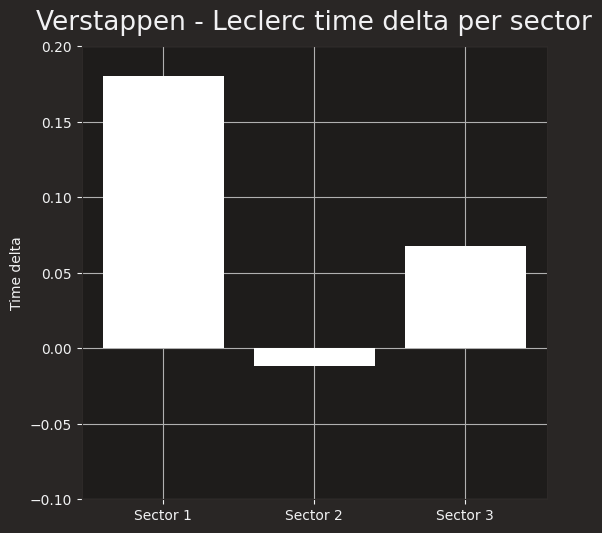

In [56]:
plt.bar(['Sector 1', 'Sector 2', 'Sector 3'], [(ver_lap.Sector1Time - lec_lap.Sector1Time).total_seconds(), (ver_lap.Sector2Time - lec_lap.Sector2Time).total_seconds(), (ver_lap.Sector3Time - lec_lap.Sector3Time).total_seconds()], color='white')
plt.grid()
plt.ylim(-0.1, 0.2)
plt.ylabel('Time delta')
plt.title('Verstappen - Leclerc time delta per sector')

Text(0.5, 1.0, 'Saudi Arabian Grand Prix 2022 \nQ3, Leclerc vs Perez')

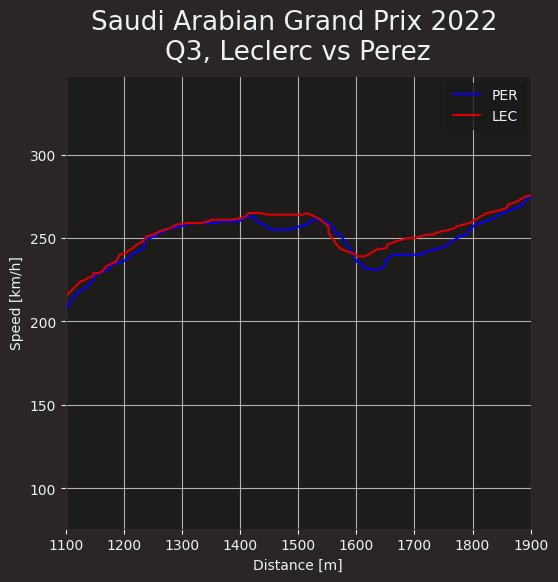

In [60]:
plt.plot(per_tel['Distance'], per_tel['Speed'], label='PER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(lec_tel['Distance'], lec_tel['Speed'], label='LEC', color=fastf1.plotting.team_color('Ferrari'))
plt.xlabel('Distance [m]')
plt.ylabel('Speed [km/h]')
plt.grid()
plt.legend()
plt.xlim(1100, 1900)
plt.title(f"{session.event.EventName} {session.event.year} \nQ3, Leclerc vs Perez")

Text(0.5, 1.0, 'Saudi Arabian Grand Prix 2022 \nQ3, Verstappen vs Perez')

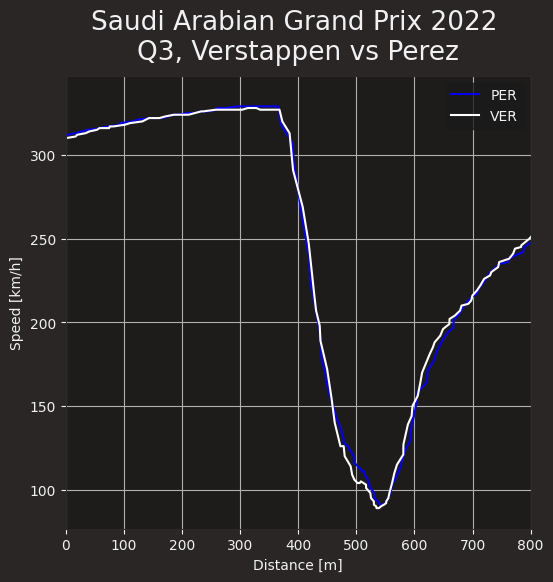

In [67]:
plt.plot(per_tel['Distance'], per_tel['Speed'], label='PER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(ver_tel['Distance'], ver_tel['Speed'], label='VER', color='white')
plt.xlabel('Distance [m]')
plt.ylabel('Speed [km/h]')
plt.grid()
plt.legend()
plt.xlim(0, 800)
plt.title(f"{session.event.EventName} {session.event.year} \nQ3, Verstappen vs Perez")